# Quantum Error Correction Project
## Philippe M. Noël, Alaisha Sharma, Nicolas Weninger
### File #3: 9-qubits code

In [1]:
import numpy as np
from qiskit import QuantumProgram
import Qconfig
from qiskit.tools.visualization import plot_histogram, plot_state

In [2]:
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config['url']) # set the APIToken and API url

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/qiskit/_quantumprogram.py:707: DeprecationWarning: set_api() will be deprecated in upcoming versions (>0.5.0). Using the API object instead is recommended.
  "Using the API object instead is recommended.", DeprecationWarning)


### 1. Run the theoretical simulation with a local quantum simulator as a control experiment.

In [45]:
# define program
qp1 = QuantumProgram()
n = 13  # number of qubits
q = qp1.create_quantum_register("q", n) # quantum register
c = qp1.create_classical_register("c", n) # classical register

In [46]:
# create circuit
SimControl9 = qp1.create_circuit("SimControl9", [q], [c])

#### Create an arbitrary state $|\psi\rangle$

In [47]:
SimControl9.h(q[0])

#### The following cell encodes the arbitrary state $|\psi\rangle$ to 9 qubits as follows:
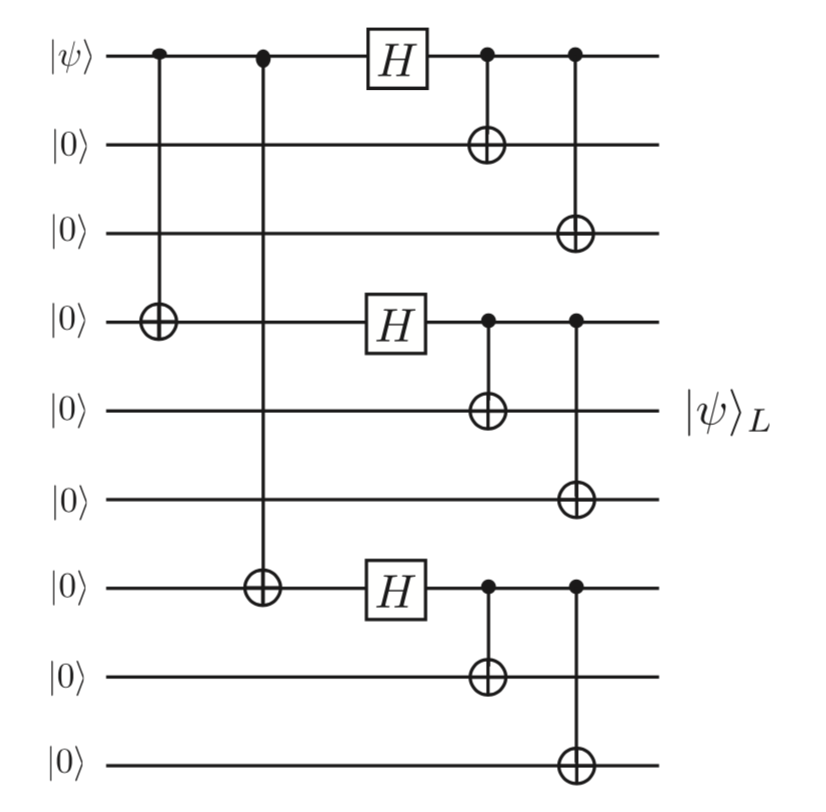

In [48]:
# Encoding Stage
SimControl9.cx(q[0],q[3])
SimControl9.cx(q[0],q[6])

SimControl9.h(q[0])
SimControl9.h(q[3])
SimControl9.h(q[6])

SimControl9.cx(q[0],q[1])
SimControl9.cx(q[0],q[3])

SimControl9.cx(q[3],q[4])
SimControl9.cx(q[3],q[5])

SimControl9.cx(q[6],q[7])
SimControl9.cx(q[6],q[8])

#### This cell performs X-error correction for the 9-qubit code using ancilla qubits 11 and 12 without the hademard gates apploed to $|\psi\rangle_{L}$, where $|\psi\rangle_{L}$  is the encoded state from above:

In [49]:
SimControl9.h(q[11])
SimControl9.h(q[12])

SimControl9.cx(q[0],q[11])
SimControl9.cx(q[1],q[11])
SimControl9.cx(q[2],q[11])
SimControl9.cx(q[3],q[11])
SimControl9.cx(q[4],q[11])
SimControl9.cx(q[5],q[11])

SimControl9.cx(q[3],q[12])
SimControl9.cx(q[4],q[12])
SimControl9.cx(q[5],q[12])
SimControl9.cx(q[6],q[12])
SimControl9.cx(q[7],q[12])
SimControl9.cx(q[8],q[12])

SimControl9.h(q[11])
SimControl9.h(q[12])

#### This cell performs Z-error correction for the 9-qubit code using ancilla qubits 9 and 10 as follows, where $|\psi\rangle_{L}$  is the encoded state from above:
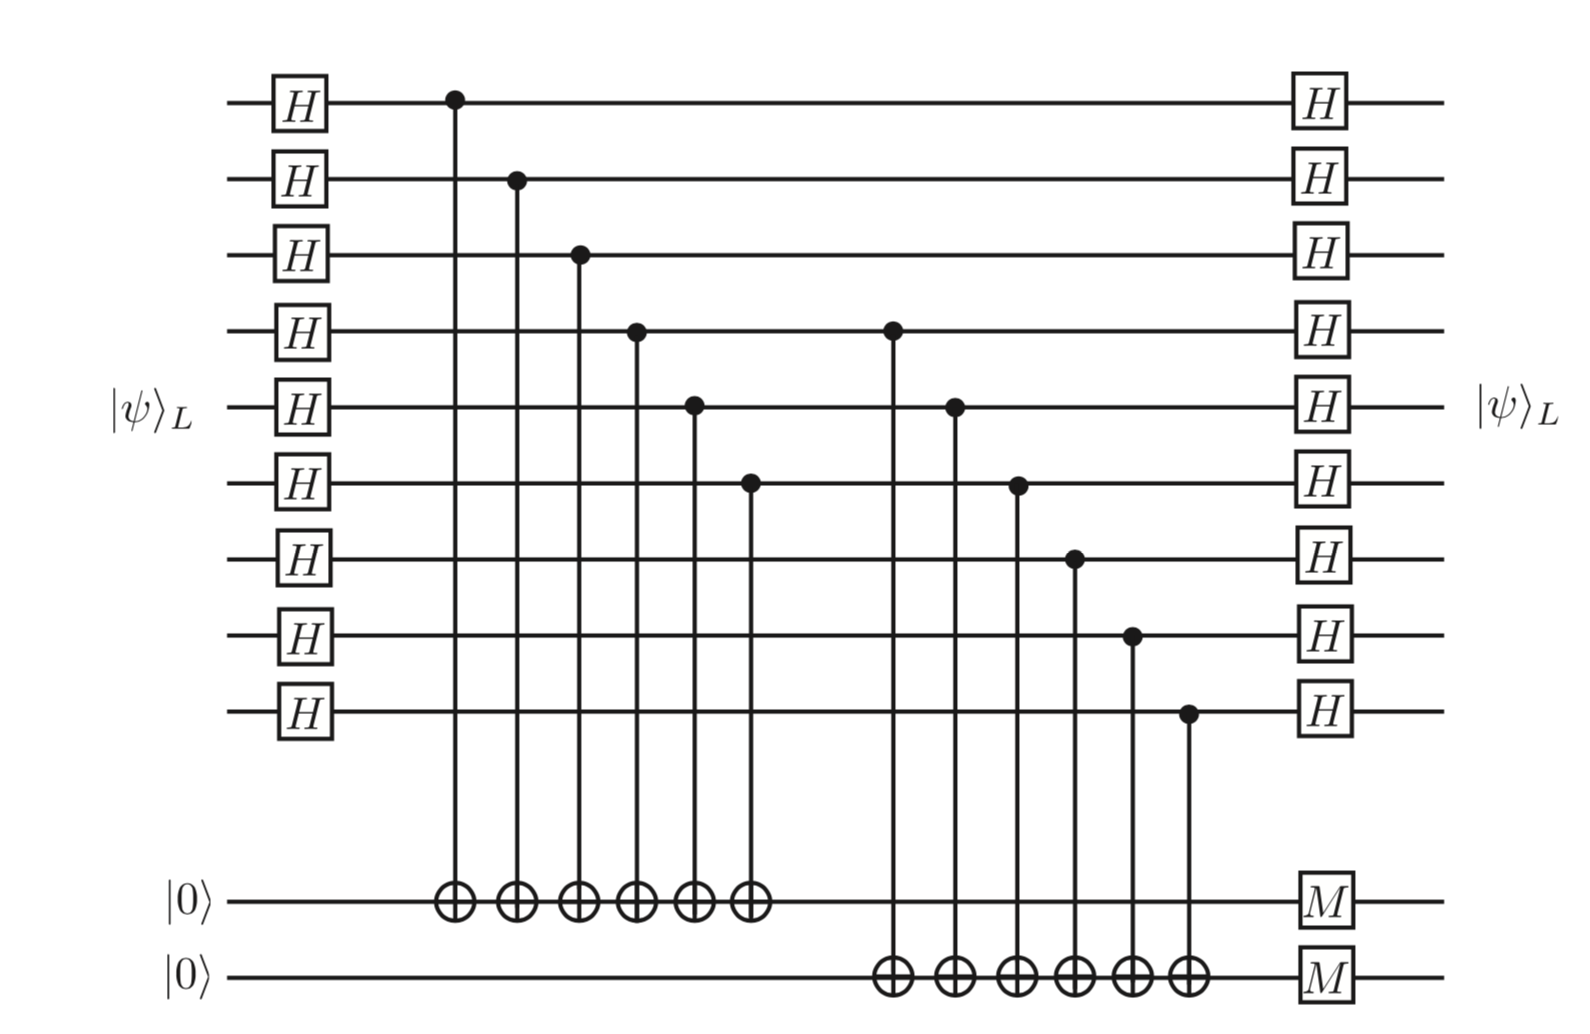

In [50]:
SimControl9.cz(q[0],q[9])
SimControl9.cz(q[1],q[9])
SimControl9.cz(q[2],q[9])
SimControl9.cz(q[3],q[9])
SimControl9.cz(q[4],q[9])
SimControl9.cz(q[5],q[9])

SimControl9.cz(q[3],q[10])
SimControl9.cz(q[4],q[10])
SimControl9.cz(q[5],q[10])
SimControl9.cz(q[6],q[10])
SimControl9.cz(q[7],q[10])
SimControl9.cz(q[8],q[10])

#### Measure X-flip ancilla qubits 11, 12 and measure Z-flip ancilla qubits 9 and 10

In [51]:
SimControl9.measure(q[11], c[11])
SimControl9.measure(q[12], c[12])
SimControl9.measure(q[9], c[9])
SimControl9.measure(q[10], c[10])

#### Execute and plot the measurement results  
The shots paremeter allowed us to simulate the circuit quickly without taking too much time, as there are $2^{13}$ states to compute with.

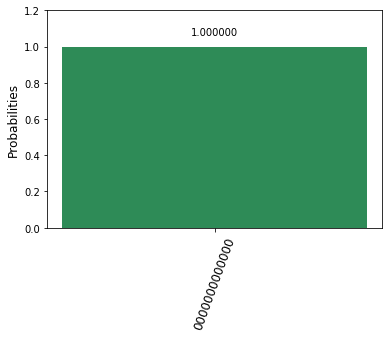

In [52]:
results = qp1.execute("SimControl9", shots = 50)
plot_histogram(results.get_counts("SimControl9"))

### 2. Run the theoretical simulation with a local quantum simulator with X and Z flips introduced.

In [109]:
# define program
qp2 = QuantumProgram()
n = 13  # number of qubits
q = qp2.create_quantum_register("q", n) # quantum register
c = qp2.create_classical_register("c", n) # classical register

In [110]:
# create circuit
SimError9 = qp2.create_circuit("SimError9", [q], [c])

#### Create an arbitrary state $|\psi\rangle$

In [111]:
SimError9.h(q[0])

#### The following cell encodes the arbitrary state $|\psi\rangle$ to 9 qubits as follows:
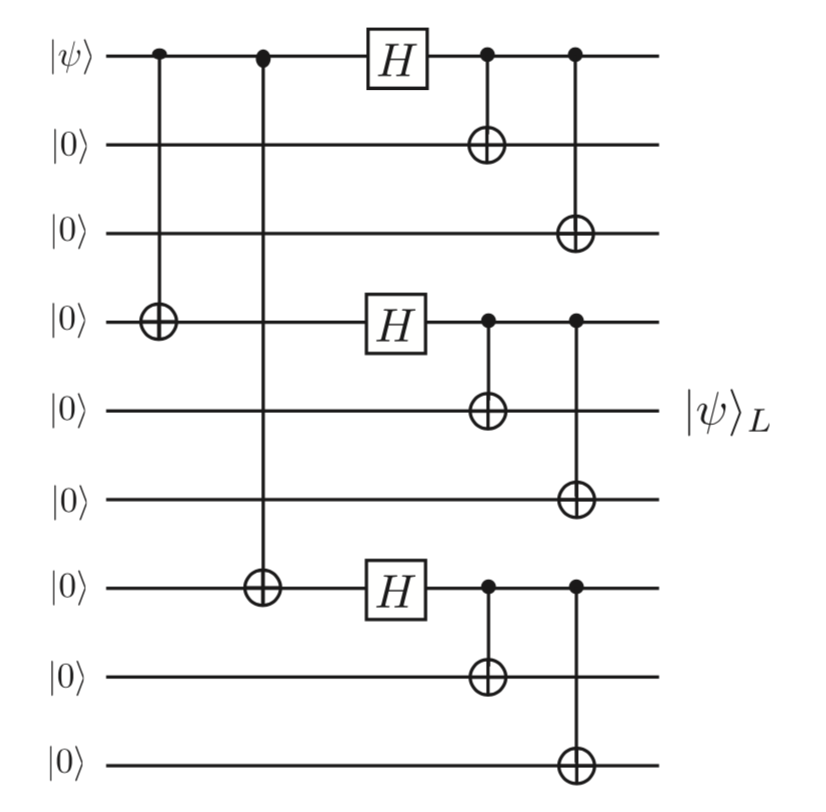

In [112]:
# Encoding Stage
SimError9.cx(q[0],q[3])
SimError9.cx(q[0],q[6])

SimError9.h(q[0])
SimError9.h(q[3])
SimError9.h(q[6])

SimError9.cx(q[0],q[1])
SimError9.cx(q[0],q[3])

SimError9.cx(q[3],q[4])
SimError9.cx(q[3],q[5])

SimError9.cx(q[6],q[7])
SimError9.cx(q[6],q[8])

#### Introduce X and Z flip error to q0

In [113]:
SimError9.z(q[1])

#### This cell performs X-error correction for the 9-qubit code using ancilla qubits 11 and 12 without the hademard gates apploed to $|\psi\rangle_{L}$, where $|\psi\rangle_{L}$  is the encoded state from above:

In [114]:
SimControl9.h(q[11])
SimControl9.h(q[12])

SimControl9.cx(q[0],q[11])
SimControl9.cx(q[1],q[11])
SimControl9.cx(q[2],q[11])
SimControl9.cx(q[3],q[11])
SimControl9.cx(q[4],q[11])
SimControl9.cx(q[5],q[11])

SimControl9.cx(q[3],q[12])
SimControl9.cx(q[4],q[12])
SimControl9.cx(q[5],q[12])
SimControl9.cx(q[6],q[12])
SimControl9.cx(q[7],q[12])
SimControl9.cx(q[8],q[12])

SimControl9.h(q[11])
SimControl9.h(q[12])

#### This cell performs Z-error correction for the 9-qubit code using ancilla qubits 9 and 10 as follows, where $|\psi\rangle_{L}$  is the encoded state from above:
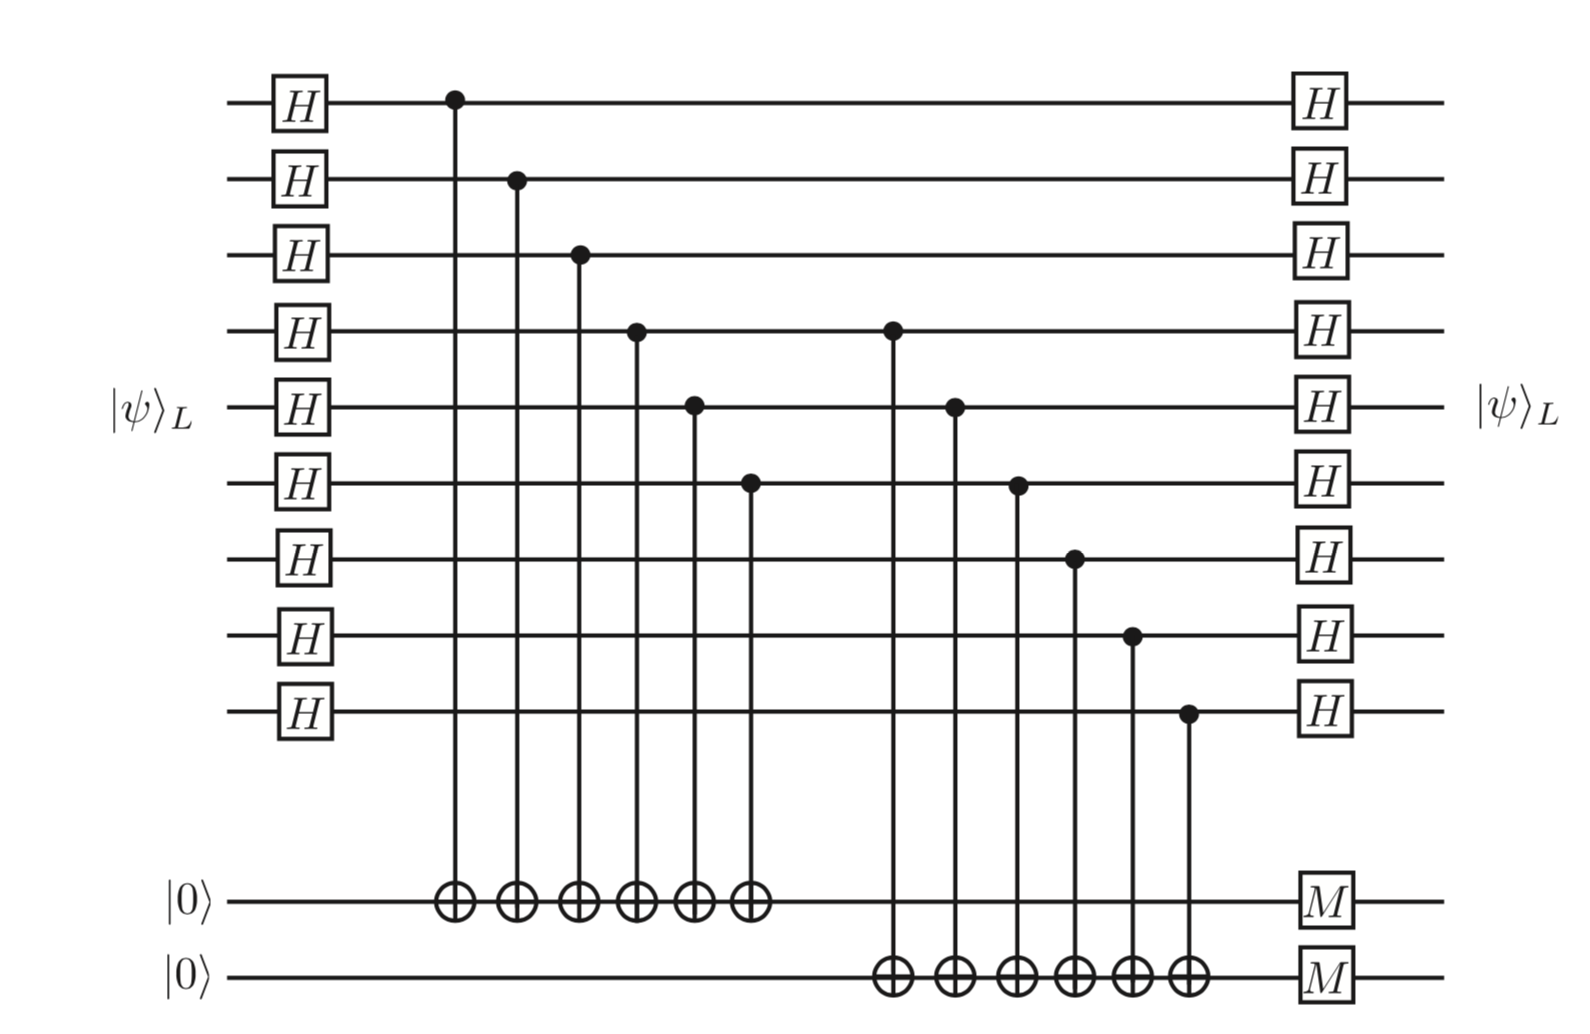

In [115]:
SimControl9.cz(q[0],q[9])
SimControl9.cz(q[1],q[9])
SimControl9.cz(q[2],q[9])
SimControl9.cz(q[3],q[9])
SimControl9.cz(q[4],q[9])
SimControl9.cz(q[5],q[9])

SimControl9.cz(q[3],q[10])
SimControl9.cz(q[4],q[10])
SimControl9.cz(q[5],q[10])
SimControl9.cz(q[6],q[10])
SimControl9.cz(q[7],q[10])
SimControl9.cz(q[8],q[10])

#### Measure X-flip ancilla qubits 11, 12 and measure Z-flip ancilla qubits 9 and 10

In [116]:
SimError9.measure(q[11], c[11])
SimError9.measure(q[12], c[12])
SimError9.measure(q[9], c[9])
SimError9.measure(q[10], c[10])

#### Execute and plot the measurement results

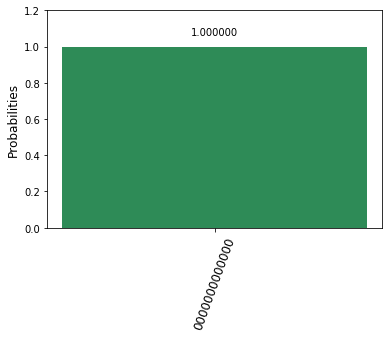

In [117]:
results2 = qp2.execute("SimError9", shots=50)
plot_histogram(results2.get_counts("SimError9"))

Neither was run on an IBMQ computer as the series of swaps that would have been required on the 16-qubit unit would have been very complicated.